In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cars_2021 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/vehicles2021.csv')
cars_2021.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
cars_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## **Initial Data Cleaning**

- Drop unnecessary variables
- Drop duplicates
- Handling Outliers

### **Drop Unnecessary Variables**

First drop columns we don't need for this project. From the information of the DataFrame, the column 'county' is all null, so we also drop this column.

In [ ]:
cols_to_drop = ['id','url','region','region_url','VIN','image_url','description','county','posting_date','lat','long']
cars_2021.drop(columns = cols_to_drop,inplace=True)
cars_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


### **Drop Duplicates**

In [ ]:
print(cars_2021.shape)
cars_2021.drop_duplicates(inplace=True)
print(cars_2021.shape)

(426880, 15)
(299190, 15)


### **Data Visualization and Deep Cleaning**

- Explore and visualize the data
- handling outliers of numerical variables
- 

In [ ]:
cars_2021.describe()

,price,year,odometer
count,2.991900e+05,298321.000000,2.964940e+05
mean,9.867114e+04,2010.282002,1.035749e+05
std,1.455136e+07,10.423073,2.328793e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.500000e+03,2007.000000,4.084250e+04
50%,1.250000e+04,2013.000000,9.056550e+04
75%,2.450000e+04,2017.000000,1.389165e+05
max,3.736929e+09,2022.000000,1.000000e+07


We noticed that there are some outliers of price, year and odometer. 

**Price**

Price is the target feature of our project.

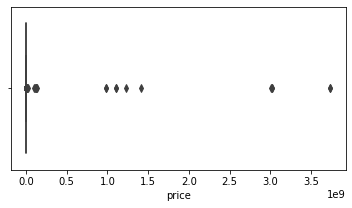

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x='price',data=cars_2021,showfliers=True)

According to the info and plots, the price ranges between 0 and $3.7 billion which is unreasonable, and the distribution is highly right skewed. We tried to find outliers by using IQR, but the result is still not good enough. So we consider to use logarithm transformation.

In [ ]:
#remove 0 values
print('Remove {} rows.'.format((cars_2021['price']==0).sum()))
cars_2021 = cars_2021[cars_2021['price']!=0]

Remove 19981 rows.


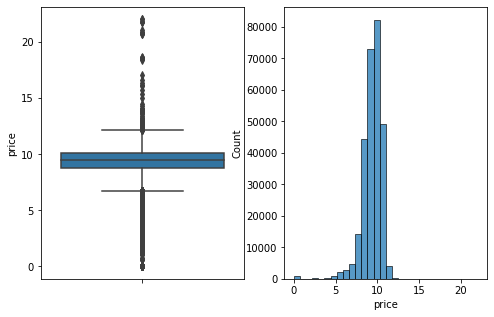

In [ ]:
# #logarithm transformation
price_log = np.log(cars_2021['price'])
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))    
sns.boxplot(ax=ax[0],y=price_log)
sns.histplot(ax=ax[1],x=price_log,bins=30)

It seems the log data be in line with log normal. So we will remove the outliers of price_log by using 3 sigma rules.

In [ ]:
# #caculating upper limit and lower limit
upper_limit =np.exp(price_log.mean()+3*price_log.std())
lower_limit =np.exp(price_log.mean()-3*price_log.std())
print('The upper limit of price is {}'.format(upper_limit))
print('The lower limit of price is {}'.format(lower_limit))


The upper limit of price is 411100.53039560065
The lower limit of price is 319.2528068052427


In [ ]:
# romove other outliers of price
print(cars_2021.shape)
a = cars_2021['price']
cars_2021=cars_2021[(a>lower_limit) & (a<upper_limit)]
print(cars_2021.shape)

(279209, 15)
(275125, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


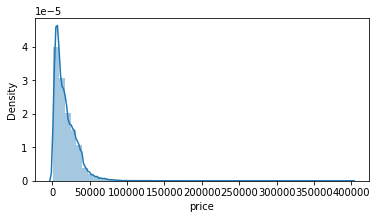

In [ ]:
plt.figure(figsize=(6,3))
sns.distplot(cars_2021['price'],kde=True,bins=50)

In [ ]:
cars_2021['price'].quantile(0.9985)

105000.0

It seems the distribution of price is still highly skewed. According to the distribution plot, we limmit the upperlimmit to 104000.

In [ ]:
#remove other outliers of price
print(cars_2021.shape)

cars_2021=cars_2021[cars_2021['price']<104000]
print(cars_2021.shape)

(275125, 15)
(274669, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


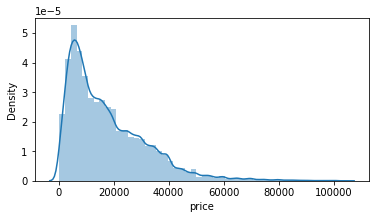

In [ ]:
plt.figure(figsize=(6,3))
sns.distplot(cars_2021['price'],kde=True,bins=50)

**year**

We keep cars less than 30 years.

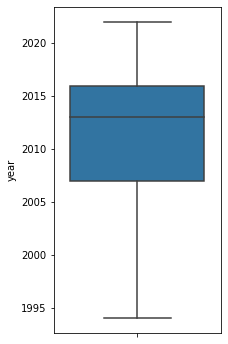

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y='year',data=cars_2021,showfliers=False)

In [ ]:
print(cars_2021.shape)
cars_2021 = cars_2021[(cars_2021['year']>=1991) & (cars_2021['year']<=2021)]
print(cars_2021.shape)

(274669, 15)
(262142, 15)


Convert the dtype to int

In [ ]:
cars_2021['year']=cars_2021['year'].astype(int)

In [ ]:
#After removing outlier of price(log-3σ) and year(recent 30 years)
cars_2021.describe()

,price,year,odometer
count,262142.000000,262142.000000,2.609610e+05
mean,17811.583405,2011.731905,1.023699e+05
std,14149.430767,6.016383,1.463341e+05
min,320.000000,1991.000000,0.000000e+00
25%,6950.000000,2008.000000,4.278900e+04
50%,13995.000000,2013.000000,9.412700e+04
75%,25900.000000,2017.000000,1.420000e+05
max,103900.000000,2021.000000,1.000000e+07


**odometer**

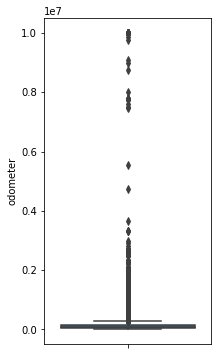

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer',data=cars_2021)

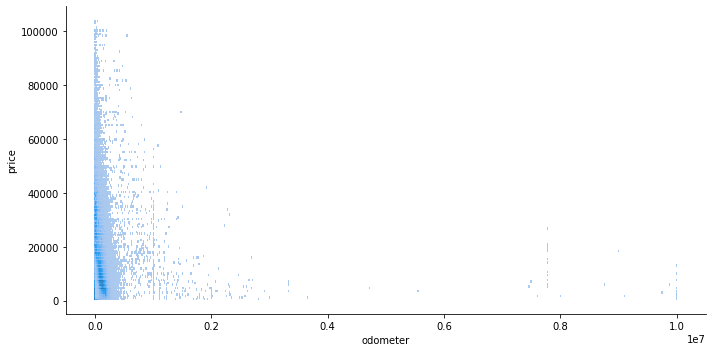

In [ ]:
sns.displot(data=cars_2021, x='odometer',y='price',aspect=2)

Doing some research, we found that Americans drive an average of 13,476 miles per year, according to the Federal Highway Administration. For the lower limit, we accept that there may be some used cars'odometer is pretty low even is 0. So we only use the upper limit result to trim the data.


In [ ]:
print(cars_2021.shape)
cars_2021 = cars_2021[cars_2021['odometer']<400000]
print(cars_2021.shape)

(262142, 15)
(259962, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


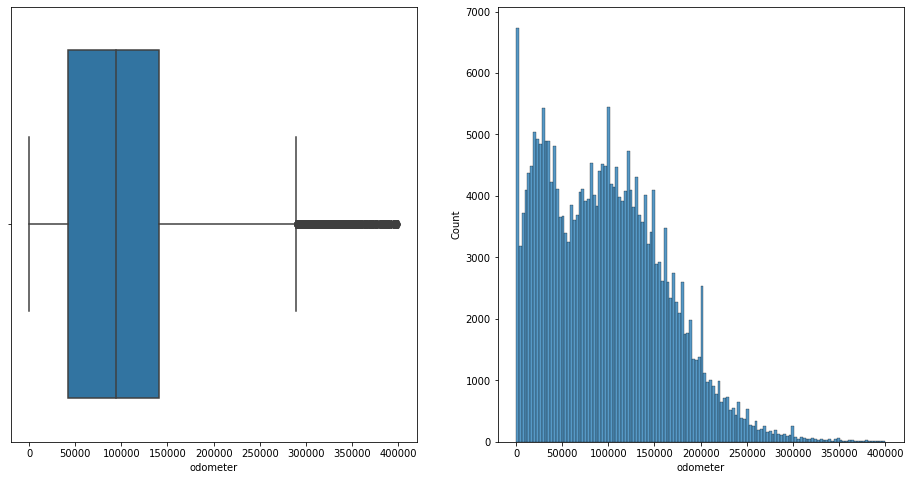

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(cars_2021['odometer'])
plt.subplot(1,2,2)
sns.histplot(cars_2021['odometer'])

In [ ]:
cars_2021.describe()

,price,year,odometer
count,259962.000000,259962.000000,259962.000000
mean,17806.449650,2011.745986,97996.685058
std,14132.519111,6.009529,64559.348267
min,320.000000,1991.000000,0.000000
25%,6950.000000,2008.000000,42548.000000
50%,13996.000000,2013.000000,93988.000000
75%,25900.000000,2017.000000,141199.250000
max,103900.000000,2021.000000,399999.000000


Now, we have already remove all the outliers of numerical variables. 

In [ ]:
cars_2021.to_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2021.csv')